# Aprendizaje NO supervisado, clustering 

### Clustering por jugadores

La idea es agrupar en cuatro grupos (cluster) los en función de sus características de juego (portero, defensa, central, delantero). El objetivo es analizar el rendimiento individual de los jugadores y su contribución al equipo.

In [6]:
import pandas as pd
# Cargar el dataset
data_path = '../../data/jugadores_limpio.csv'
players_df = pd.read_csv(data_path)


In [7]:
#Desplegamos la forma del dataframe
players_df.shape

(5019, 37)

In [8]:
# Preprocesamiento y selección de características relevantes
features_df = players_df[['Jugador', 'Equipo', 'Posc', 'Edad', 'PJ', 'Titular', 'Mín', 'Gls90.', 'Ast90', 'xG90', 'xAG90', 'npxG90', 'npxG+xAG90']]
features_df.fillna(0, inplace=True)

C:\Users\albab\AppData\Local\Temp\ipykernel_28644\3837858685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.fillna(0, inplace=True)


In [9]:
features_df.shape

(5019, 13)

In [10]:
#ahora miramos los valores unicos que hay de cada uno
features_df.nunique()

Jugador       2518
Equipo          79
Posc            11
Edad            29
PJ              13
Titular         14
Mín            831
Gls90.         149
Ast90          121
xG90           148
xAG90           99
npxG90         139
npxG+xAG90     175
dtype: int64

In [11]:
features_df.isnull().any()

Jugador       False
Equipo        False
Posc          False
Edad          False
PJ            False
Titular       False
Mín           False
Gls90.        False
Ast90         False
xG90          False
xAG90         False
npxG90        False
npxG+xAG90    False
dtype: bool

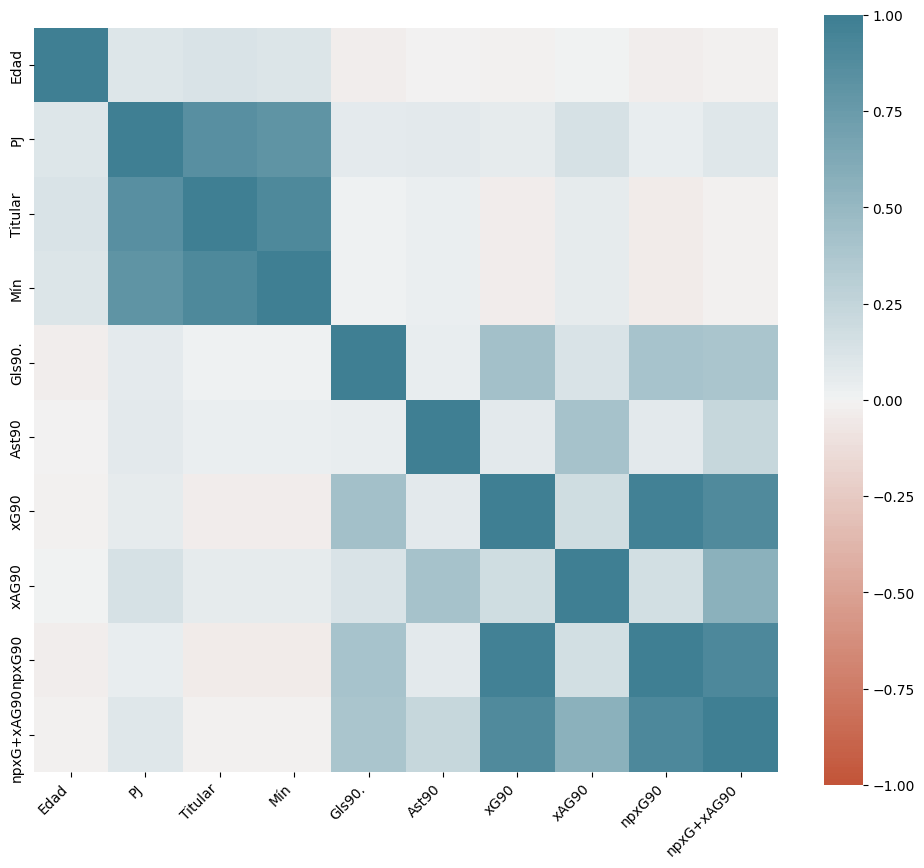

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Solo seleccionar columnas numéricas para la matriz de correlación
numeric_features_df = features_df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con características numéricas
corr = numeric_features_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()


In [13]:
# Normalizar los datos del dataset con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(numeric_features_df)
X_norm = pd.DataFrame(x_scaled, columns=numeric_features_df.columns)

In [14]:
# desplegamos el valor de los campos despues del escalado
X_norm.head()

,Edad,PJ,Titular,Mín,Gls90.,Ast90,xG90,xAG90,npxG90,npxG+xAG90
0,0.595238,0.416667,0.461538,0.496489,0.050556,0.024,0.048387,0.075397,0.048387,0.066414
1,0.595238,0.333333,0.384615,0.434303,0.000000,0.014,0.000000,0.043651,0.000000,0.010436
2,0.452381,0.083333,0.076923,0.091274,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0.761905,0.416667,0.384615,0.487462,0.000000,0.000,0.000949,0.007937,0.000949,0.002846
4,0.714286,0.416667,0.461538,0.541625,0.009444,0.000,0.015180,0.059524,0.015180,0.030361


c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

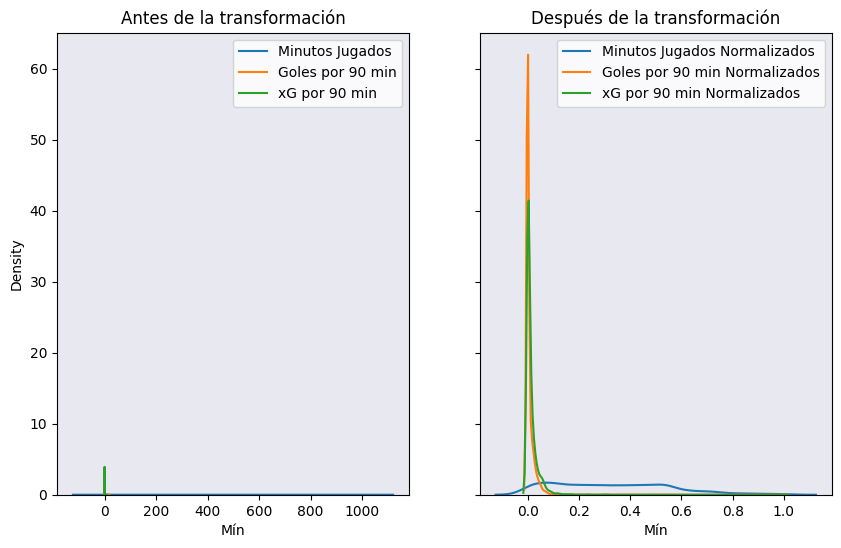

In [15]:
import seaborn as sns
# Visualización antes de la normalización para algunas características específicas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6), sharey=True)
ax1.set_facecolor('#E8E8F1')
ax1.set_title('Antes de la transformación')
sns.kdeplot(players_df['Mín'], ax=ax1, label='Minutos Jugados')
sns.kdeplot(players_df['Gls90.'], ax=ax1, label='Goles por 90 min')
sns.kdeplot(players_df['xG90'], ax=ax1, label='xG por 90 min')
ax1.legend()
# Visualización después de la normalización
ax2.set_facecolor('#E8E8F1')
ax2.set_title('Después de la transformación')
sns.kdeplot(X_norm['Mín'], ax=ax2, label='Minutos Jugados Normalizados')
sns.kdeplot(X_norm['Gls90.'], ax=ax2, label='Goles por 90 min Normalizados')
sns.kdeplot(X_norm['xG90'], ax=ax2, label='xG por 90 min Normalizados')
ax2.legend()
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# A partir de aquí, puedes proceder con la reducción de dimensionalidad, clusterización, etc.
# Por ejemplo, aplicar PCA como se mostró anteriormente
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_norm)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])


In [17]:
from sklearn.cluster import DBSCAN, OPTICS, AgglomerativeClustering, MeanShift, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
# Configurar y ajustar K-Means

# Aplicar diferentes algoritmos de clustering

algorithms = {
    'K-Means': KMeans(n_clusters=4, random_state=42), 
    'Mean-Shift': MeanShift(),
    'Mini-Batch K-Means': MiniBatchKMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=5),
    'OPTICS': OPTICS(min_samples=5),
    'GMM': GaussianMixture(n_components=4, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=4)
}

# Diccionario para almacenar las etiquetas y puntuaciones de silueta
labels_dict = {}
silhouette_scores_dict = {}

for name, algorithm in algorithms.items():
    # Ajustar el algoritmo de clustering
    labels = algorithm.fit_predict(X_norm)
    
    # Almacenar las etiquetas del clustering
    labels_dict[name] = labels
    
    # Calcular y almacenar el coeficiente de silueta
    if len(set(labels)) > 1:  # El coeficiente de silueta no puede calcularse si solo hay un cluster
        silhouette_score_value = silhouette_score(X_norm, labels)
        silhouette_scores_dict[name] = silhouette_score_value


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Visualizar el coeficiente de silueta para cada algoritmo
print("Silhouette Scores:")
for name, score in silhouette_scores_dict.items():
    print(f"{name}: {score}")

# Visualización opcional de los resultados de clustering para uno de los algoritmos
# Selecciona un algoritmo de clustering para visualizar
algorithm_name = 'K-Means'  # Cambia esto por el nombre del algoritmo que quieres visualizar
chosen_labels = labels_dict[algorithm_name]
pca_df['Cluster'] = chosen_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', style='Cluster', s=100)
plt.title(f'{algorithm_name} Clustering')
plt.show()


Silhouette Scores:


KeyError: 'K-Means'

El coeficiente de silueta es una medida utilizada para evaluar la calidad de un agrupamiento o clustering. Proporciona una medida de cuán bien se agrupan los objetos dentro de un mismo grupo y cuán separados están de los objetos de otros grupos.

El coeficiente de silueta se calcula para cada objeto en el conjunto de datos y varía entre -1 y 1. Un valor de 1 indica que el objeto está bien agrupado y separado de otros grupos, mientras que un valor cercano a -1 indica que el objeto está mal agrupado y más cerca de los objetos de otros grupos.

El cálculo del coeficiente de silueta se basa en dos medidas: la distancia media intra-cluster, que mide la similitud entre un objeto y los demás objetos en su mismo grupo, y la distancia media inter-cluster, que mide la similitud entre un objeto y los objetos de otros grupos. Estas distancias se utilizan para calcular un valor de silueta para cada objeto, que es la diferencia entre la distancia media intra-cluster y la distancia media inter-cluster, dividida por el máximo de ambas distancias.

En resumen, el coeficiente de silueta proporciona una medida cuantitativa de la calidad de un agrupamiento, teniendo en cuenta tanto la cohesión dentro de los grupos como la separación entre los grupos. Un valor alto de coeficiente de silueta indica un buen agrupamiento, mientras que un valor bajo indica un agrupamiento deficiente.

In [ ]:
# Add the 'Jugador' column to pca_df after PCA and K-Means
pca_df['Jugador'] = players_df['Jugador'].values

# Group players by cluster and print them
players_in_clusters = pca_df.groupby('Cluster')['Jugador'].apply(list)
for cluster, players in players_in_clusters.items():
    print(f"Cluster {cluster}:")
    print(", ".join(players))
    print("\n")
    

KeyError: 'Cluster'